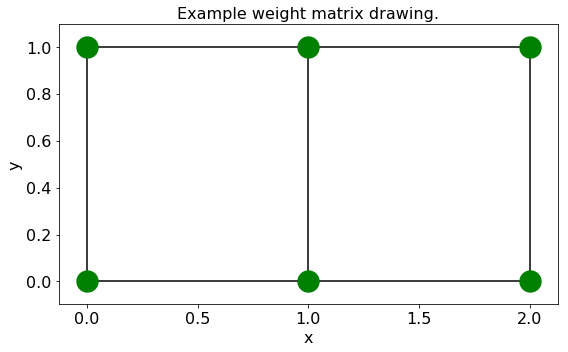

In [1]:
%reset -f
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from anim.build_frames import w_to_line
from plot import set_font_size

positions = np.array([[0, 0], [1, 0], [2, 0], [0, 1], [1, 1], [2, 1]]).T

w = np.array([
    [0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0],
])

fig, ax = plt.subplots(1, 1, figsize=(8, 5), tight_layout=True)
ax.scatter(positions[0], positions[1], lw=0, c='g', s=500, zorder=1)
line = w_to_line(w, positions)
ax.plot(line[0], line[1], color='k', zorder=0)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Example weight matrix drawing.')

set_font_size(ax, 16)

In [2]:
%reset -f
import numpy as np

from aux import save_time_file
from anim import build_frames
from ntwk import NtwkResponse

TIME_FILE = 'test_anim/cell_types/time.npy'
NTWK_FILE = 'test_anim/cell_types/ntwk.npy'
FRAME_PREFIX = 'test_anim/cell_types/ntwk/frame'

ts = np.arange(10) * (1/30)
vs = -0.068*np.ones((10, 6))
spks = np.zeros(vs.shape, dtype=bool)
gs = {'AMPA': np.zeros(vs.shape)}
ws_rcr = {
    'AMPA': np.array([
        [0, 1, 0, 1, 0, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0],
    ])
}
ws_up = {'AMPA': np.zeros((6, 2))}
v_rest = -0.068
v_th = -0.036
cell_types = ['EX', 'EX', 'EX', 'INH', 'INH', 'INH']

positions = np.array([[0, 0], [1, 0], [2, 0], [0, 1], [1, 1], [2, 1]]).T

x_ticks = [-0.5, 2.5]
y_ticks = [-0.5, 1.5]
x_tick_labels = [0, 2]
y_tick_labels = [0, 1]

resp = NtwkResponse(
    vs=vs, spks=spks, gs=gs, ws_rcr=ws_rcr, ws_up=ws_up,
    v_rest=v_rest, v_th=v_th, cell_types=cell_types, pfcs=positions)

save_time_file(TIME_FILE, ts)
resp.save(NTWK_FILE)

frames_black = build_frames.ntwk_activity(
    save_prefix=FRAME_PREFIX + '_black',
    time_file=TIME_FILE,
    ntwk_file=NTWK_FILE,
    cxn_lw=2,
    x_ticks=x_ticks,
    y_ticks=y_ticks,
    x_tick_labels=x_tick_labels,
    y_tick_labels=y_tick_labels,
    resting_size=500)

frames_colored = build_frames.ntwk_activity(
    save_prefix=FRAME_PREFIX + '_colored',
    time_file=TIME_FILE,
    ntwk_file=NTWK_FILE,
    resting_size=500,
    cxn_color={
        ('EX', 'EX'): (0, 0, 0),
        ('EX', 'INH'): (1, 0, 0, 0.3),
        ('INH', 'EX'): (1, 0, 0, 0.3),
        ('INH', 'INH'): (0, 0, 1),
    },
    cxn_lw=2,
    x_ticks=x_ticks,
    y_ticks=y_ticks,
    x_tick_labels=x_tick_labels,
    y_tick_labels=y_tick_labels,
    default_color={'EX': (0, 0, 0), 'INH': (0, 0, 1)})

print('Uncolored frames saved with prefix "{}".'.format(FRAME_PREFIX + '_black'))
print('Colored frames saved with prefix "{}".'.format(FRAME_PREFIX + '_colored'))

Uncolored frames saved with prefix "test_anim/cell_types/ntwk/frame_black".
Colored frames saved with prefix "test_anim/cell_types/ntwk/frame_colored".
